In [1]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
os.chdir('drive/MyDrive/paperBuild/Compressor/data')

In [4]:
!ls

data_0_1_.dat  data_3_1_.dat  data_6_0_.dat  xtrain.npy
data_1_0_.dat  data_4_0_.dat  data_7_1_.dat  ytest.npy
data_2_0_.dat  data_5_1_.dat  xtest.npy      ytrain.npy


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# data per revolution: 50000 samples/sec / (2400/60) =  1250
perRev=1250

In [33]:
item=0

In [34]:
os.listdir()[item]

'data_7_1_.dat'

In [35]:
os.listdir()[item].split('_')

['data', '7', '1', '.dat']

In [36]:
raw=pd.read_fwf(os.listdir()[item], header=None)

In [ ]:
raw=raw.iloc[-20*perRev: -10*perRev,:]

In [11]:
raw.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.130310,0.262604,0.196838,4.991150,-0.233459,-0.605316,-0.614624,0.033264,0.120850,-0.007324,...,-0.531921,-0.357361,-1.240234,-0.797424,-0.081024,0.187988,-0.005188,-0.272369,-1.246338,-0.895844
1,0.164185,0.288696,0.199585,4.990692,-0.256805,-0.618134,-0.531311,0.134125,0.136871,0.060272,...,-0.486450,-0.371857,-1.213989,-0.645294,-0.099792,0.171509,0.045624,-0.314178,-1.211853,-0.847778
2,0.181580,0.318756,0.231781,4.989624,-0.333099,-0.569763,-0.443268,0.107574,0.147705,0.110474,...,-0.411835,-0.436707,-1.064148,-0.514374,-0.116730,0.166626,0.075531,-0.378571,-1.085052,-0.680542
3,0.175323,0.288086,0.264587,4.990234,-0.408173,-0.514832,-0.386200,0.142975,0.169678,0.148315,...,-0.358276,-0.494843,-0.914154,-0.352325,-0.125427,0.161285,0.141602,-0.487061,-0.927887,-0.661316
4,0.132599,0.290375,0.271912,4.990387,-0.459442,-0.442810,-0.281372,0.159760,0.180664,0.155487,...,-0.229034,-0.599976,-0.800629,-0.245209,-0.133820,0.145721,0.196686,-0.568085,-0.746613,-0.559387


In [13]:
raw.iloc[0:3,9]

0   -0.007324
1    0.060272
2    0.110474
Name: 9, dtype: float64

In [30]:
raw.index.values

array([     0,      1,      2, ..., 444997, 444998, 444999])

In [ ]:
temp=pd.Series(raw.iloc[:,9])
temp.rolling(window=1250).std()

420000         NaN
420001         NaN
420002         NaN
420003         NaN
420004         NaN
            ...   
432495    0.257657
432496    0.257394
432497    0.257051
432498    0.256612
432499    0.256163
Name: 9, Length: 12500, dtype: float64

<Axes: >

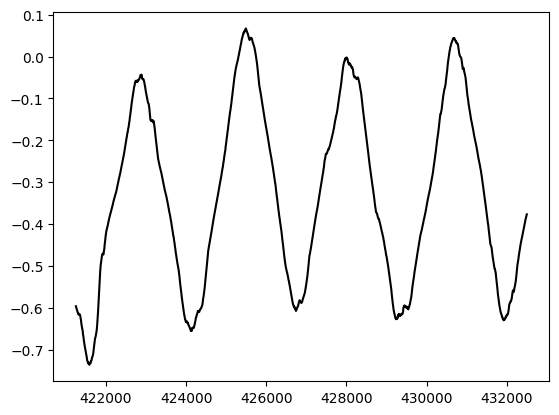

In [ ]:
temp=pd.Series(raw.iloc[:,9])
temp.rolling(window=1250).mean().plot(style='k')

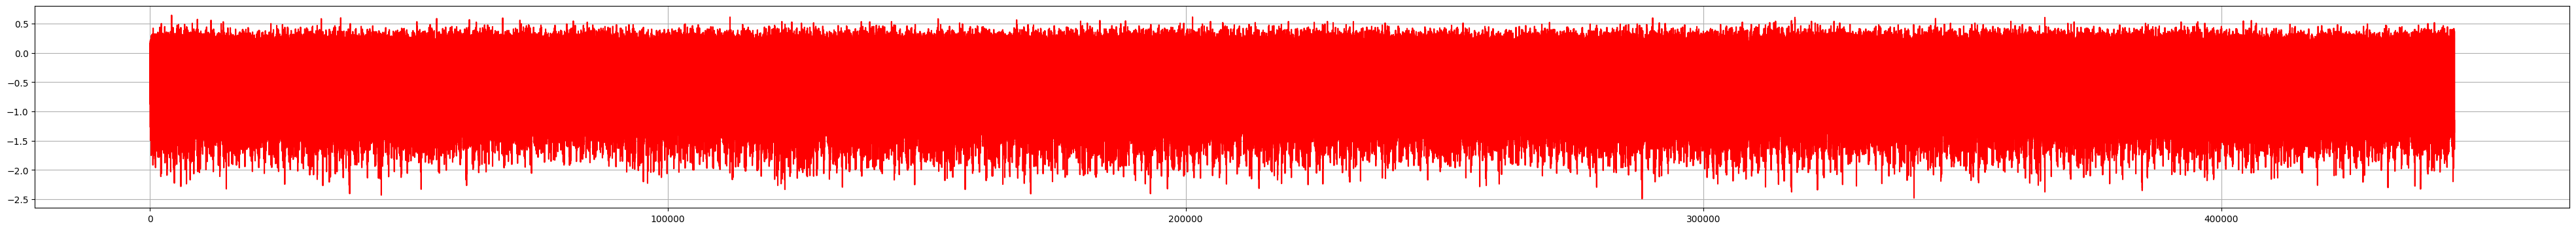

In [32]:
plt.figure(figsize=(50,4))
plt.plot(raw.iloc[:400000,23], color='red')
plt.grid()

In [24]:
np.save("data_6_0_.npy",raw.iloc[:400000,:].shape)

In [25]:
!ls

data_0_1_.dat  data_3_1_.dat  data_6_0_.dat  xtest.npy	 ytrain.npy
data_1_0_.dat  data_4_0_.dat  data_7_1_.dat  xtrain.npy
data_2_0_.dat  data_5_1_.dat  data_7_1_.npy  ytest.npy


In [ ]:
channels=[[4,5,6,7,8],[14,13,12,11,15],[18,19,20,21,22],[24,25,26,0,1]]
pressurecoeff=[[ 1580.1, 1595, 1457.4, 1450.1, 1414.1],[1204.9, 1048.4, 1185.7, 1191.5, 1201.4],[1194.7, 1201.2, 1194.5, 1851.9, 1773.9],[1198, 1203.4, 1199.7, 1299.9, 2077.2]]
hall=[3]
threshold=2.5 # 0~5

In [ ]:
hall_logic=raw.iloc[:,hall]
hall_logic.values

array([[4.991455],
       [4.99176 ],
       [4.990692],
       ...,
       [4.97879 ],
       [4.978638],
       [4.980927]])

In [ ]:
len(hall_logic.values)

12500

In [ ]:
def hall_reform(hall_logic, threshold):
  data=hall_logic.values
  for i in range(len(data)):
    data[i] = 0 if data[i]>threshold else 1

  return data

hall_logic=hall_reform(hall_logic, threshold)

In [ ]:
hall_logic

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
channels

[[4, 5, 6, 7, 8],
 [14, 13, 12, 11, 15],
 [18, 19, 20, 21, 22],
 [24, 25, 26, 0, 1]]

In [ ]:
chord=0

data=raw.iloc[:,channels[chord][:]]

In [ ]:
data

,4,5,6,7,8
420000,0.018463,-0.030518,-0.206451,-0.152130,0.216675
420001,-0.029297,-0.069885,-0.246582,-0.143585,0.149536
420002,-0.045624,-0.109863,-0.341797,-0.229034,0.168152
420003,-0.138855,-0.141907,-0.413971,-0.117035,0.124512
420004,-0.190277,-0.175018,-0.485535,-0.182037,0.020142
...,...,...,...,...,...
432495,0.253296,0.309296,0.240784,0.331726,0.302124
432496,0.261841,0.289917,0.228577,0.311432,0.223236
432497,0.253448,0.286102,0.225372,0.305481,0.256500
432498,0.260010,0.279694,0.236511,0.285950,0.258484


In [ ]:
data.iloc[0,2]

-0.206451

In [ ]:
# 2400 rpm 50KHz Blade Passage 60: 20 samples per passage per revolution

In [ ]:
hall_flag=hall_logic[1:]-hall_logic[:-1] # Transition from high to low or low to high

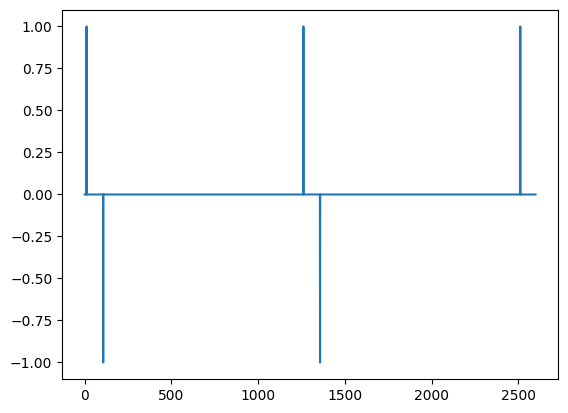

In [ ]:
plt.plot(hall_flag[:2600]) # 60 passages

In [ ]:
sum(hall_flag==1) # Number of revolution in a dataset

array([10])

In [ ]:
def indices_work(hall_flag):
  temp=np.array([])
  for i in range(len(hall_flag)):
    if hall_flag[i]==1:
      temp=np.append(temp, i+1)

  return temp

indices=indices_work(hall_flag)
indices=indices.astype(int)


In [ ]:
len(indices)


10

In [ ]:
indices

array([   12,  1262,  2512,  3762,  5011,  6261,  7510,  8759, 10008,
       11257])

In [ ]:
indices[1:-1]

array([ 1262,  2512,  3762,  5011,  6261,  7510,  8759, 10008])

In [ ]:
len(channels[chord][:])

5

In [ ]:
pressurecoeff[chord][:]

[1580.1, 1595, 1457.4, 1450.1, 1414.1]

In [ ]:
datapts=64 # 4 chords, before and after hall flags give 8 datapoints for each file.
# 8 files (4 no stall and 4 stall) generating 64 time series data. Each chord has
# specific pressure coefficient.

In [ ]:
np.arange(0,datapts,2*len(channels))

array([ 0,  8, 16, 24, 32, 40, 48, 56])

In [ ]:
np.random.seed(42)
np.multiply(np.random.uniform(0,1,(3,3)), [1, 10, 100])

array([[3.74540119e-01, 9.50714306e+00, 7.31993942e+01],
       [5.98658484e-01, 1.56018640e+00, 1.55994520e+01],
       [5.80836122e-02, 8.66176146e+00, 6.01115012e+01]])

In [ ]:
pressurecoeff[chord][:]

[1580.1, 1595, 1457.4, 1450.1, 1414.1]

In [ ]:
temp=np.zeros([3,5,2])
np.size(temp[0])

10

In [ ]:
raw.iloc[0:5, [1,2,3]]

,1,2,3
0,0.381927,0.180817,4.990387
1,0.250092,0.167236,4.989929
2,0.226440,0.177460,4.992676
3,0.260010,0.176392,4.990845
4,0.270081,0.180969,4.989014


In [ ]:
np.arange(0,len(channels))

array([0, 1, 2, 3])

In [ ]:
samples=20
datapts=64
batch=np.arange(0,datapts,2*len(channels))
dp=np.zeros([datapts,len(indices), samples, len(channels[chord][:])]) # indices for file "point8_4_stall.dat"
# dp=np.array([])
p=0

for chord in np.arange(0,len(channels)):
#for p in batch:
  #chord=0
  dataR=np.zeros([len(indices), samples, len(channels[chord][:])]) # Revolution, time series, sensors
  dataL=np.zeros([len(indices), samples, len(channels[chord][:])])
  n=0 # Revolution count
  coefficients=pressurecoeff[chord][:]
  for m in indices: #Revolution/Hall trigger for one file
    dataR[n]=raw.iloc[m:m+samples, channels[chord][:]].values # any coefficient multiplication should be done here
    dataR[n]=np.multiply(dataR[n], coefficients)
    dataL[n]=raw.iloc[m-samples:m, channels[chord][:]].values # any coefficient multiplication should be done here
    dataL[n]=np.multiply(dataL[n], coefficients)
    n=n+1

  #chord 0
  dp[p]=dataR
  dp[p+1]=dataL
  p=p+2

dataR.shape

(147, 20, 5)

In [ ]:
dp.shape

(64, 147, 20, 5)

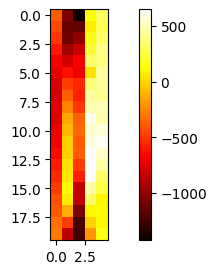

In [ ]:
plt.figure(figsize=(8,3))
plt.imshow(dp[0][0], cmap='hot', interpolation='nearest', )
#plt.axis('off')
plt.colorbar()
plt.show()

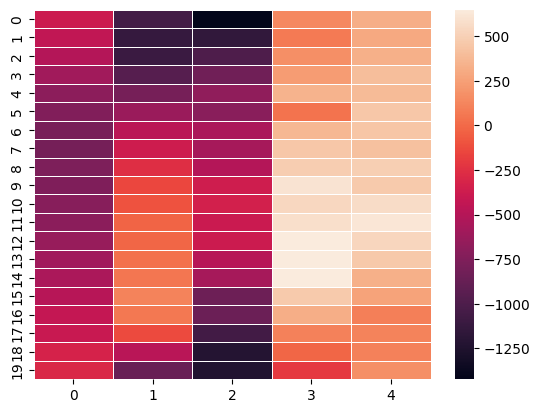

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt_

ax = sns.heatmap(dp[0][0], linewidth=0.5)
#plt_.axis('off')
plt_.show()

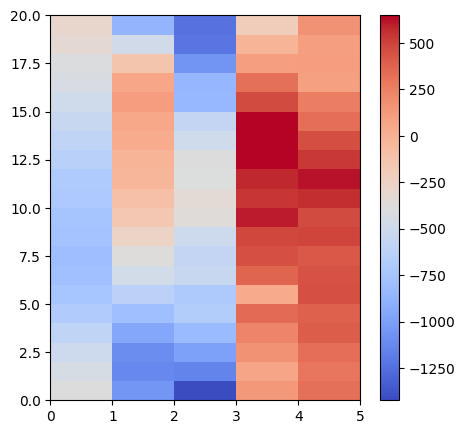

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
pcm = ax.pcolormesh(dp[0][0], cmap='coolwarm')
pcm.set_clim(min(dp[0][0].reshape(-1)),max(dp[0][0].reshape(-1)))
fig.colorbar(pcm, ax=ax)
plt.show()

In [ ]:
data_=dp[0]
data_[data_==0]=0.0000001

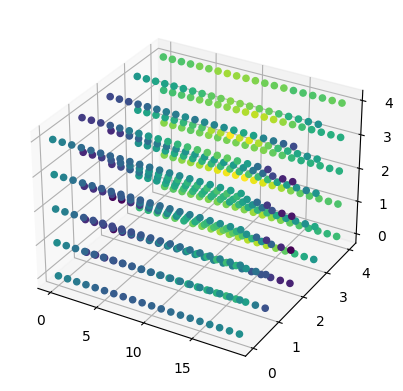

In [ ]:
layers=5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, x, y = data_[0:layers].nonzero()
ax.scatter(x, y, z, c=data_[0:layers].reshape(-1), alpha=1)
plt.show()

In [ ]:
data_[0:layers].shape

(5, 20, 5)

In [ ]:
temp="data_5_6"

In [ ]:
int(temp.split('_')[2])

6

In [ ]:
'data_'+str(5)+'_'+str(0)

'data_5_0'

In [ ]:
50000